In [1]:
import os
import pandas as pd
import pickle
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from imageio import imread

In [2]:
parties = [p.name for p in os.scandir('data') if os.path.isdir(p)]

users = {
    p: [user.path for user in os.scandir(os.path.join('data', p)) if os.path.isfile(user)] for p in parties
}

parties_on_compass = {'pis': [-0.4, 0.6], 'po': [0.1, 0.0], 'lewica': [-0.5, -0.5],
                      'konfederacja': [0.5, 0.5], 'psl': [0.3, 0.1]}

In [8]:
for p in users:
    print(p, len(users[p]))

konfederacja 10
lewica 13
pis 17
po 12
psl 15


In [9]:
from collections import defaultdict
party_tweets = {p:0 for p in parties}
user_tweets = {}
tweets_total = 0

for p in parties:
    for user in users[p]:
        data = pd.read_csv(user, sep='\t')
        tweets = list(data['tweet'])
        party_tweets[p] += len(tweets)
        user_tweets[user] = len(tweets)
        tweets_total+=len(tweets)

In [12]:
tweets_total

70101

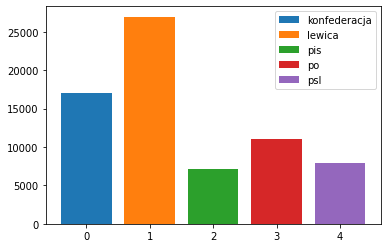

In [10]:
for i, p in enumerate(parties):
    plt.bar(i, party_tweets[p], label=p)
plt.legend()
plt.show();

In [11]:
party_tweets

{'konfederacja': 17049, 'lewica': 26974, 'pis': 7177, 'po': 11000, 'psl': 7901}

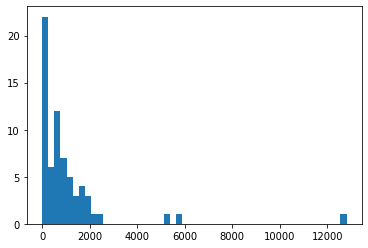

In [5]:
plt.hist(user_tweets.values(), bins=50);

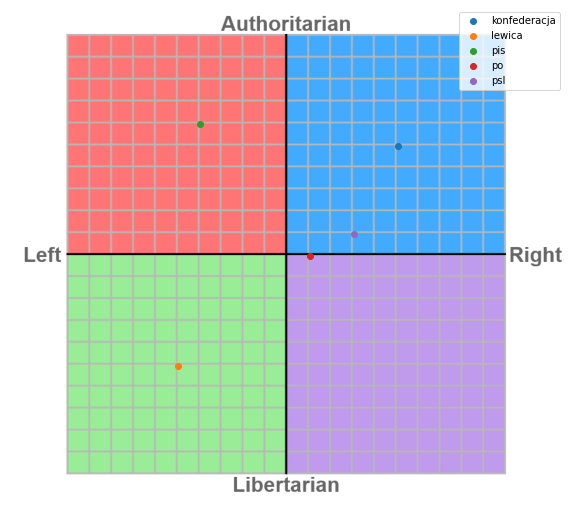

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(imread('assets/compass.png'))
figure_size = {'size': 710, 'right':97, 'top':46}
plt.axis('off')

for p in parties:
    pos = np.array([parties_on_compass[p][0], -parties_on_compass[p][1]])
    pos *= figure_size['size']/2
    pos += np.array([97, 46]) + figure_size['size']/2
    ax.scatter(pos[0], pos[1], label=p)

plt.legend()